<a href="https://colab.research.google.com/github/MissMukuru/Austalia_Weather_pred/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [518]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [519]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [520]:
data = pd.read_csv('/content/drive/MyDrive/super_store.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [521]:
data.shape

(9800, 18)

In [522]:
data.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [523]:
data.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [524]:
data.duplicated().sum()

0

In [525]:
data.dropna(subset=['Postal Code'], inplace = True)

In [526]:
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Finding outliers
outliers = data[(data['Sales'] < (Q1 - 1.5 * IQR)) | (data['Sales'] > (Q3 + 1.5 * IQR))]


# Step 2: Count the number of outliers
num_outliers = outliers.shape[0]

print(f"Number of outliers: {num_outliers}")

# Define limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
cleaned_data = data[(data['Sales'] >= lower_bound) & (data['Sales'] <= upper_bound)]


Number of outliers: 1141


In [527]:
data.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [528]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y') # Specify the correct format for day/month/year
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y') # Apply the same format for consistency

In [529]:
data.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [530]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

Text(0, 0.5, 'Sales')

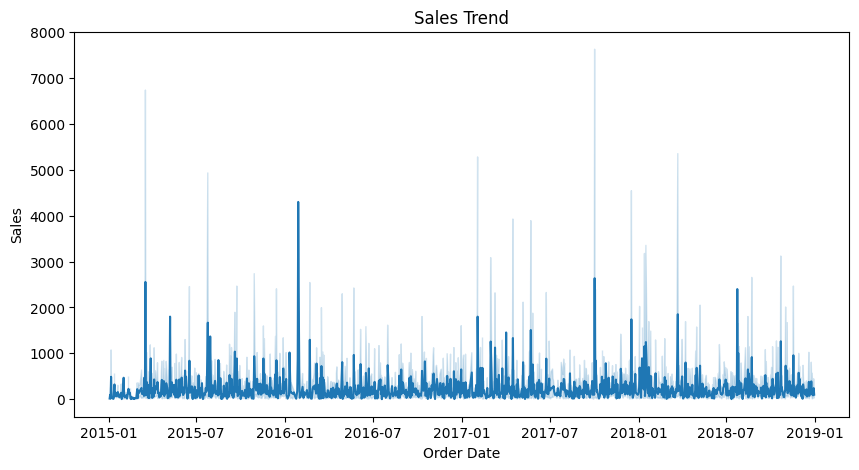

In [531]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = data , x = 'Order Date', y = 'Sales')
plt.title('Sales Trend')
plt.xlabel('Order Date')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

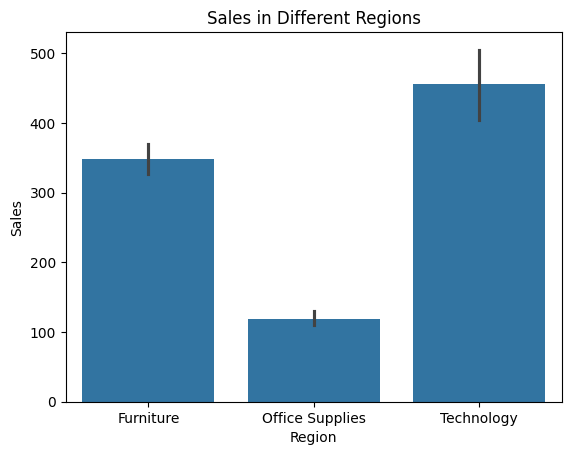

In [532]:
sns.barplot(data = data, x = 'Category', y = 'Sales')
plt.title('Sales in Different Regions')
plt.xlabel('Region')
plt.ylabel('Sales')

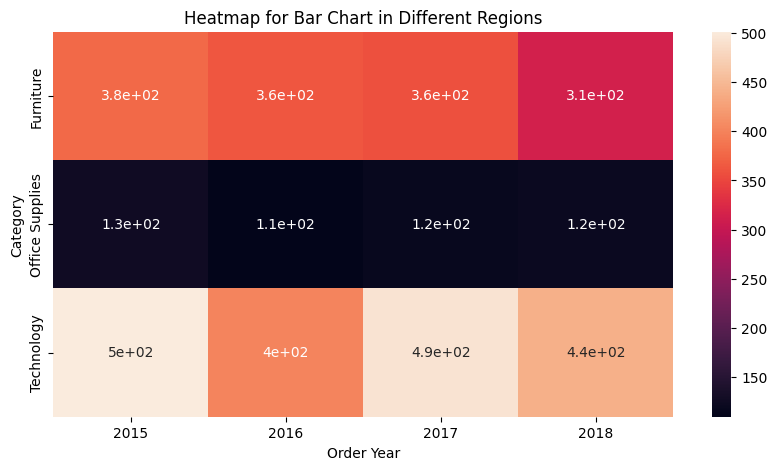

In [533]:
data['Order Year'] = data['Order Date'].dt.year

heatmap_data = pd.pivot_table(data, values='Sales', index='Category', columns='Order Year')

plt.figure(figsize = (10, 5))
sns.heatmap(data = heatmap_data, annot = True)
plt.title('Heatmap for Bar Chart in Different Regions')
plt.show()


Text(0, 0.5, 'Sales')

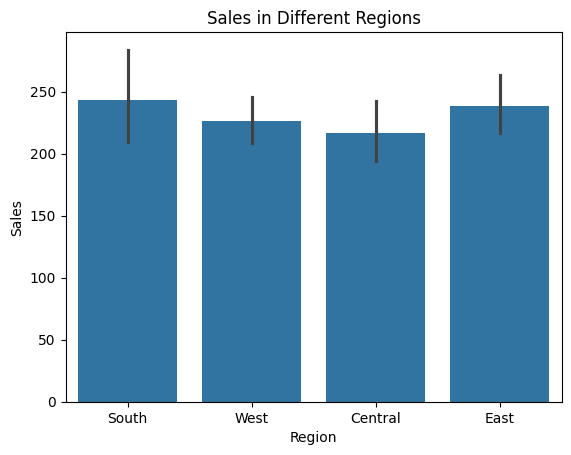

In [534]:
sns.barplot(data = data, x = 'Region', y = 'Sales')
plt.title('Sales in Different Regions')
plt.xlabel('Region')
plt.ylabel('Sales')

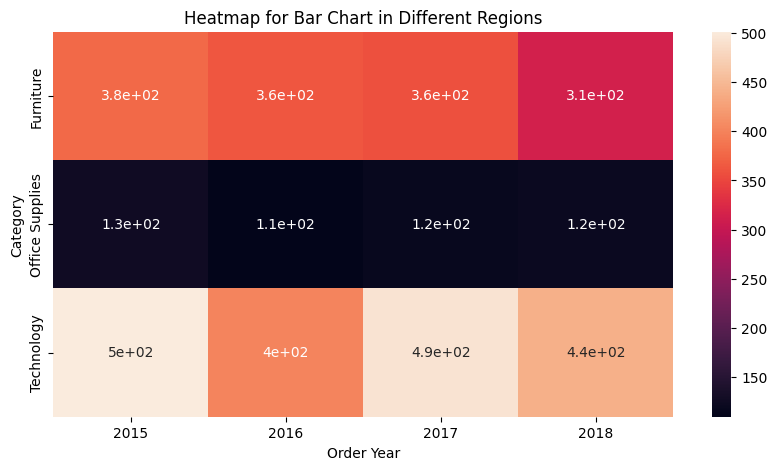

In [535]:

plt.figure(figsize = (10, 5))
sns.heatmap(data = heatmap_data, annot = True)
plt.title('Heatmap for Bar Chart in Different Regions')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

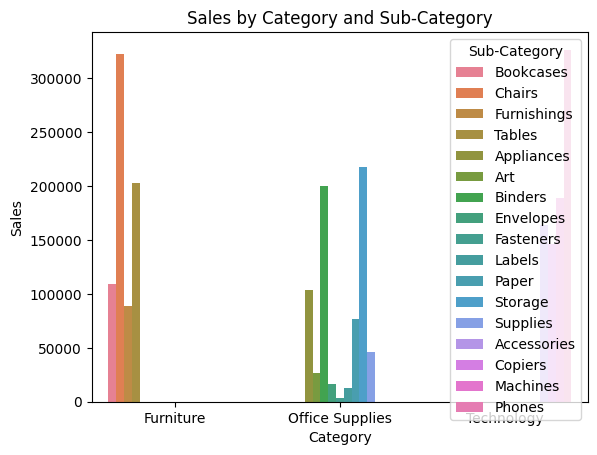

In [536]:
grouped_sales = data.groupby(['Category', 'Sub-Category'])['Sales'].sum()

grouped_sales = grouped_sales.reset_index()

sns.barplot(data = grouped_sales, x = 'Category', y = 'Sales', hue = 'Sub-Category')
plt.title('Sales by Category and Sub-Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.legend(title='Sub-Category')
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Cisco TelePresence System EX90 Videoconferencing Unit'),
  Text(1, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(2, 0, 'GBC Ibimaster 500 Manual ProClick Binding System'),
  Text(3, 0, 'Ibico EPK-21 Electric Binding System'),
  Text(4, 0, '3D Systems Cube Printer, 2nd Generation, Magenta'),
  Text(5, 0, 'HP Designjet T520 Inkjet Large Format Printer - 24" Color')])

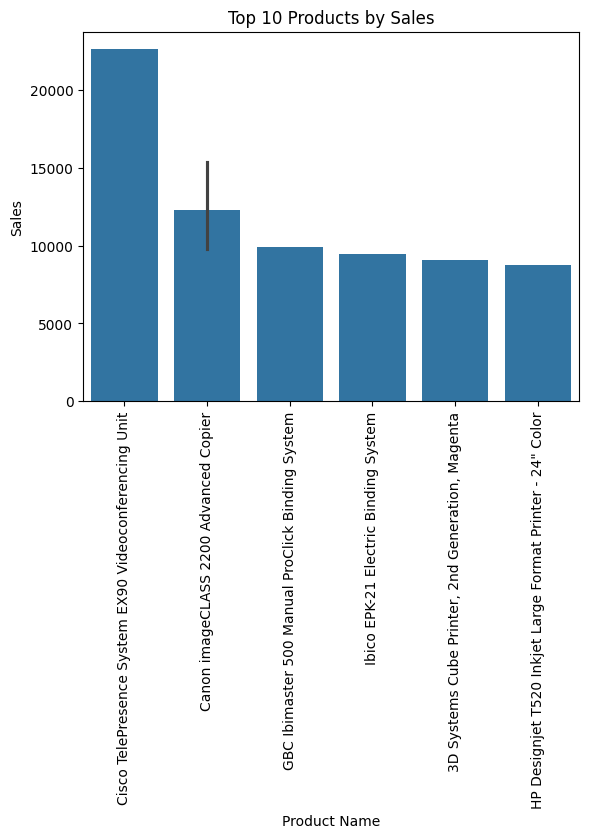

In [537]:
Top_10_sales = data[['Product Name', 'Sales']].sort_values(by = 'Sales', ascending = False).head(10)

sns.barplot(data = Top_10_sales, x = 'Product Name', y = 'Sales')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.xticks(rotation = 90)

Text(0, 0.5, 'Sales')

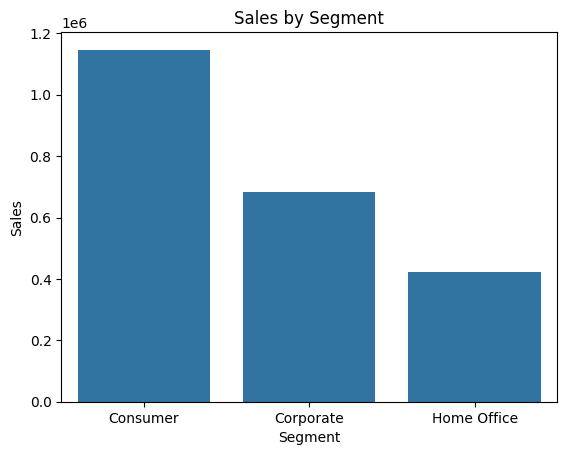

In [538]:
Segmented_sales = data.groupby('Segment')['Sales'].sum()

sns.barplot(x = Segmented_sales.index, y = Segmented_sales)
plt.title('Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')

Text(0.5, 0, 'Ship Mode')

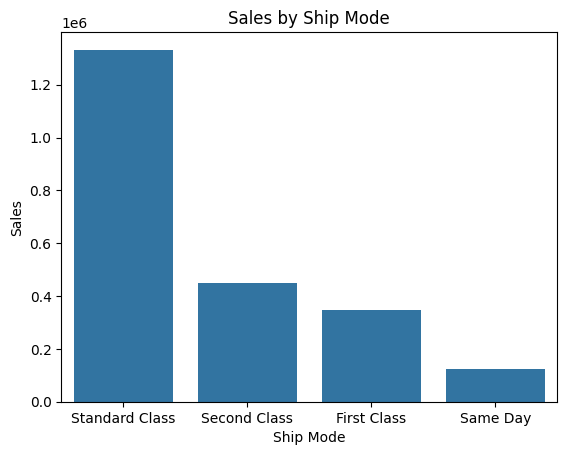

In [539]:
Popular_shipmodes = data.groupby('Ship Mode')['Sales'].sum().sort_values(ascending = False).head(5)

sns.barplot(x = Popular_shipmodes.index, y = Popular_shipmodes)
plt.title('Sales by Ship Mode')
plt.xlabel('Ship Mode')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sean Miller'),
  Text(1, 0, 'Tamara Chand'),
  Text(2, 0, 'Raymond Buch'),
  Text(3, 0, 'Tom Ashbrook'),
  Text(4, 0, 'Adrian Barton'),
  Text(5, 0, 'Ken Lonsdale'),
  Text(6, 0, 'Sanjit Chand'),
  Text(7, 0, 'Hunter Lopez'),
  Text(8, 0, 'Sanjit Engle'),
  Text(9, 0, 'Christopher Conant')])

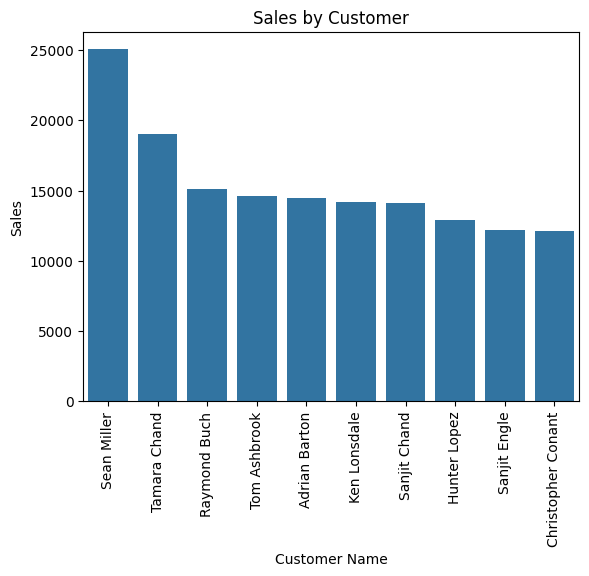

In [540]:
Sales_by_customer = data.groupby('Customer Name')['Sales'].sum().sort_values(ascending = False).head(10)

sns.barplot(x = Sales_by_customer.index, y = Sales_by_customer)
plt.title('Sales by Customer')
plt.xlabel('Customer Name')
plt.xticks(rotation = 90)

Text(0.5, 0, 'Order ID')

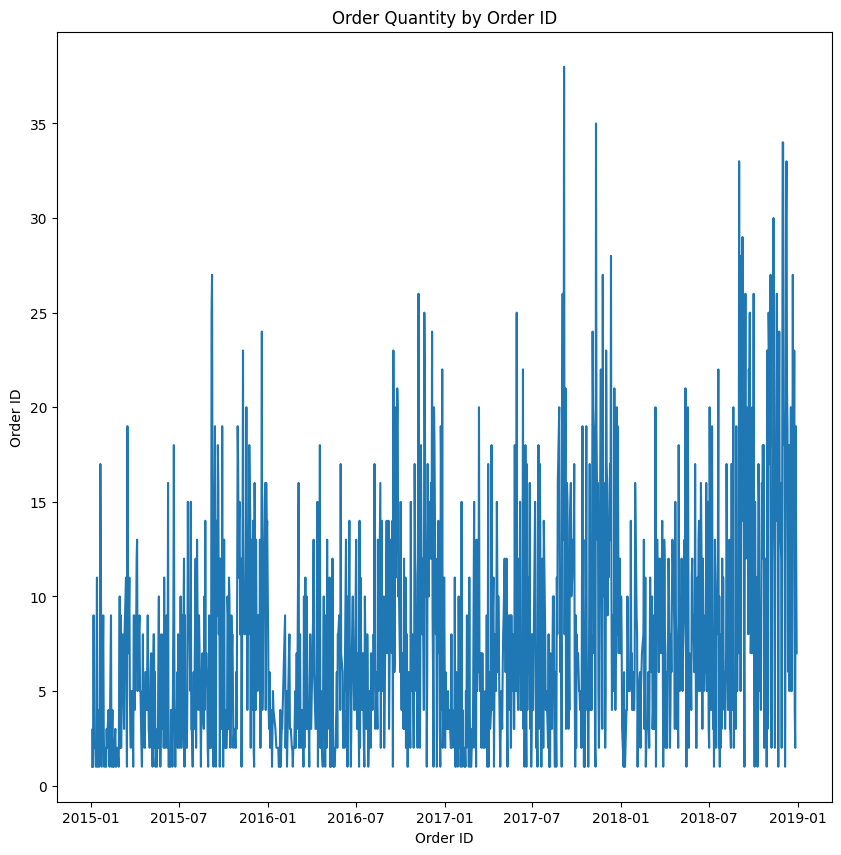

In [541]:
Order_quantity = data.groupby('Order Date')['Order ID'].count()

plt.figure(figsize = (10, 10))

sns.lineplot(data = Order_quantity.reset_index(), x = 'Order Date', y = 'Order ID')
plt.title('Order Quantity by Order ID')
plt.xlabel('Order ID')

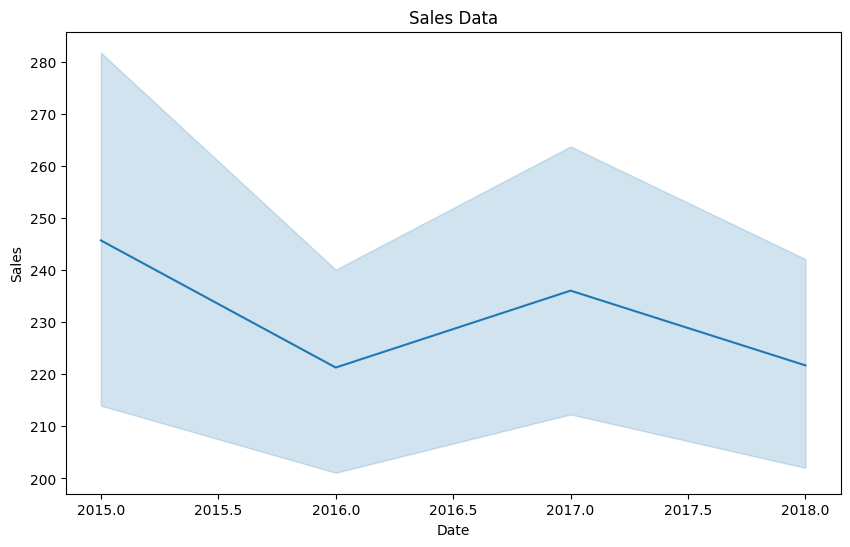

In [542]:

plt.figure(figsize=(10,6))
sns.lineplot(data = data, x = 'Order Year', y = 'Sales') # Use the subset to plot
plt.title('Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend
plt.show()

In [543]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [544]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [545]:
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Day'] = data['Order Date'].dt.day
data['DayOfWeek'] = data['Order Date'].dt.dayofweek

In [546]:
 X_train_encoded.isnull().sum()

,0
Order Year,0
Ship Mode_Same Day,0
Ship Mode_Second Class,0
Ship Mode_Standard Class,0
Segment_Corporate,0
Segment_Home Office,0
Category_Office Supplies,0
Category_Technology,0
Sub-Category_Appliances,0
Sub-Category_Art,0


In [547]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order Year', 'Year', 'Month', 'Day',
       'DayOfWeek'],
      dtype='object')

In [549]:
feature_variables = [
    'Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
    'Category', 'Sub-Category', 'Product Name', 'Year', 'Month', 'Day', 'DayOfWeek'
]
target_variable = 'Sales'

X = data[feature_variables]
y = data[target_variable]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7831, 14), (1958, 14), (7831,), (1958,))

In [551]:
# One-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
    'Category', 'Sub-Category', 'Product Name', 'Year', 'Month', 'Day', 'DayOfWeek'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
    'Category', 'Sub-Category', 'Product Name', 'Year', 'Month', 'Day', 'DayOfWeek'], drop_first=True)

# Align the columns of X_test to match X_train
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

X_train_encoded.shape, X_test_encoded.shape

((7831, 3053), (1958, 3053))

In [552]:
X.dtypes

,0
Ship Mode,object
Segment,object
Country,object
City,object
State,object
Postal Code,float64
Region,object
Category,object
Sub-Category,object
Product Name,object


In [553]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression()

In [554]:
y_pred = model.predict(X_test_encoded)

Text(0.5, 1.0, 'Actual vs. Predicted Sales')

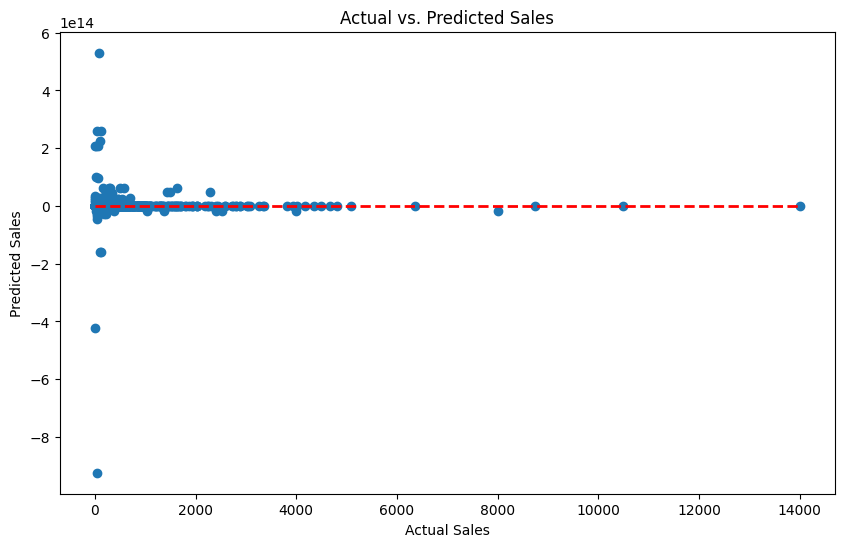

In [555]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')

In [557]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 2666120421633.2563
Mean Squared Error (MSE): 8.957856567429188e+26
R-squared (R²): -1.8313716682384464e+21
